In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop = stopwords.words('english')
from sklearn.metrics import f1_score, accuracy_score
from sklearn import model_selection, naive_bayes
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

In [4]:
df0=pd.read_csv('./BR.csv')
df6=pd.read_csv('./imbd_less.csv')

In [5]:
df = pd.merge(df0,df6, on = 'Title')

In [6]:
df['authors'] = df['authors'].str.extract(r'\'(.*)\'')
df['categories'] = df['categories'].str.extract(r'\'(.*)\'')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  70000 non-null  object 
 1   Title               69999 non-null  object 
 2   Price               9001 non-null   float64
 3   User_id             56244 non-null  object 
 4   profileName         56241 non-null  object 
 5   review/helpfulness  70000 non-null  object 
 6   review/score        70000 non-null  float64
 7   review/time         70000 non-null  int64  
 8   review/summary      69991 non-null  object 
 9   review/text         70000 non-null  object 
 10  description         58138 non-null  object 
 11  authors             67250 non-null  object 
 12  image               61986 non-null  object 
 13  previewLink         69084 non-null  object 
 14  publisher           52734 non-null  object 
 15  publishedDate       68734 non-null  object 
 16  info

In [8]:
df.dropna(subset=['Title'], inplace=True)
df.shape

(69999, 19)

In [9]:
print(df.columns)

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text',
       'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')


In [10]:
df=df.drop('Price',axis=1)
df=df.drop('User_id',axis=1)
df=df.drop('review/time',axis=1)
df=df.drop('description',axis=1)
df=df.drop('image',axis=1)
df=df.drop('previewLink',axis=1)
df=df.drop('publisher',axis=1)
df=df.drop('publishedDate',axis=1)
df=df.drop('infoLink',axis=1)
df=df.drop('review/helpfulness',axis=1)
df.head(5)


,Id,Title,profileName,review/score,review/summary,review/text,authors,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Julie Strain,Comics & Graphic Novels,NaN
1,0826414346,Dr. Seuss: American Icon,Kevin Killian,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel,Biography & Autobiography,NaN
2,0826414346,Dr. Seuss: American Icon,John Granger,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel,Biography & Autobiography,NaN
3,0826414346,Dr. Seuss: American Icon,"Roy E. Perry ""amateur philosopher""",4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel,Biography & Autobiography,NaN
4,0826414346,Dr. Seuss: American Icon,"D. H. Richards ""ninthwavestore""",4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel,Biography & Autobiography,NaN


In [11]:
titles = df['Title'].nunique()
print(titles)

4687


In [12]:
df.drop_duplicates(inplace = True)
df.shape


(69389, 9)

In [13]:
df.isna().sum()

Id                    0
Title                 0
profileName       13578
review/score          0
review/summary        9
review/text           0
authors            2728
categories         9659
ratingsCount      31874
dtype: int64

In [14]:
df['word_count'] = df['review/text'].apply(lambda x: len(x.split(' ')))

In [15]:
df.head()

,Id,Title,profileName,review/score,review/summary,review/text,authors,categories,ratingsCount,word_count
0,1882931173,Its Only Art If Its Well Hung!,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Julie Strain,Comics & Graphic Novels,NaN,86
1,0826414346,Dr. Seuss: American Icon,Kevin Killian,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel,Biography & Autobiography,NaN,252
2,0826414346,Dr. Seuss: American Icon,John Granger,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel,Biography & Autobiography,NaN,310
3,0826414346,Dr. Seuss: American Icon,"Roy E. Perry ""amateur philosopher""",4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel,Biography & Autobiography,NaN,560
4,0826414346,Dr. Seuss: American Icon,"D. H. Richards ""ninthwavestore""",4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel,Biography & Autobiography,NaN,273


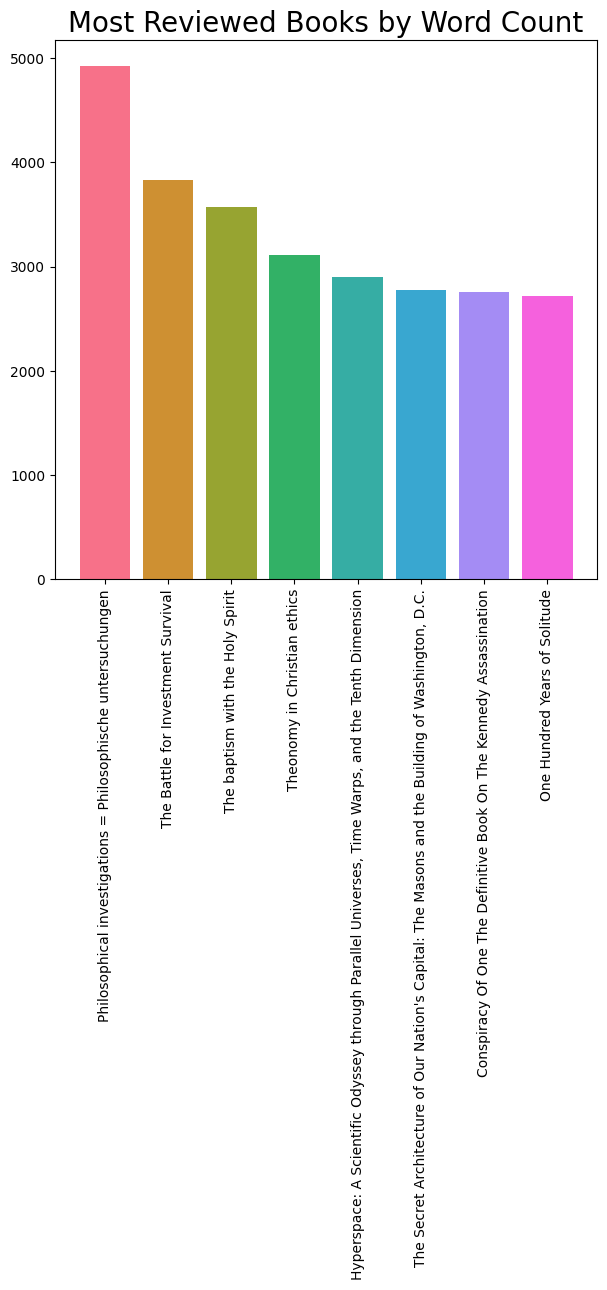

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns  
plt.figure(figsize=(7, 7))
cou = df[df['word_count'] > 2500][['Title', 'word_count']].sort_values(by='word_count', ascending=False)
colors = sns.color_palette('husl', n_colors=len(cou))
bars = plt.bar(cou['Title'], cou['word_count'], color=colors)
plt.title('Most Reviewed Books by Word Count', fontsize=20)
plt.xticks(rotation=90)
plt.show()

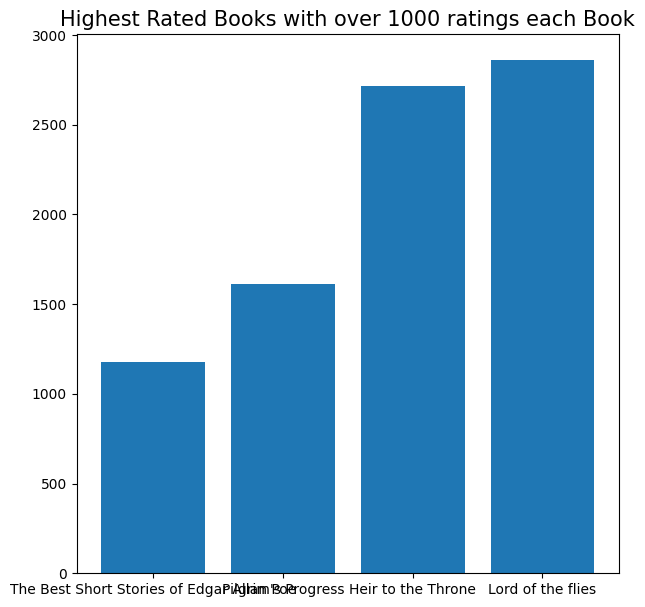

In [17]:
plt.figure(figsize = (7, 7))
rating_counts = df[df['ratingsCount'] > 1000][['Title','ratingsCount']].drop_duplicates()
plt.bar(rating_counts['Title'],rating_counts['ratingsCount'])
plt.title('Highest Rated Books with over 1000 ratings each Book', fontsize = 15)
plt.show()



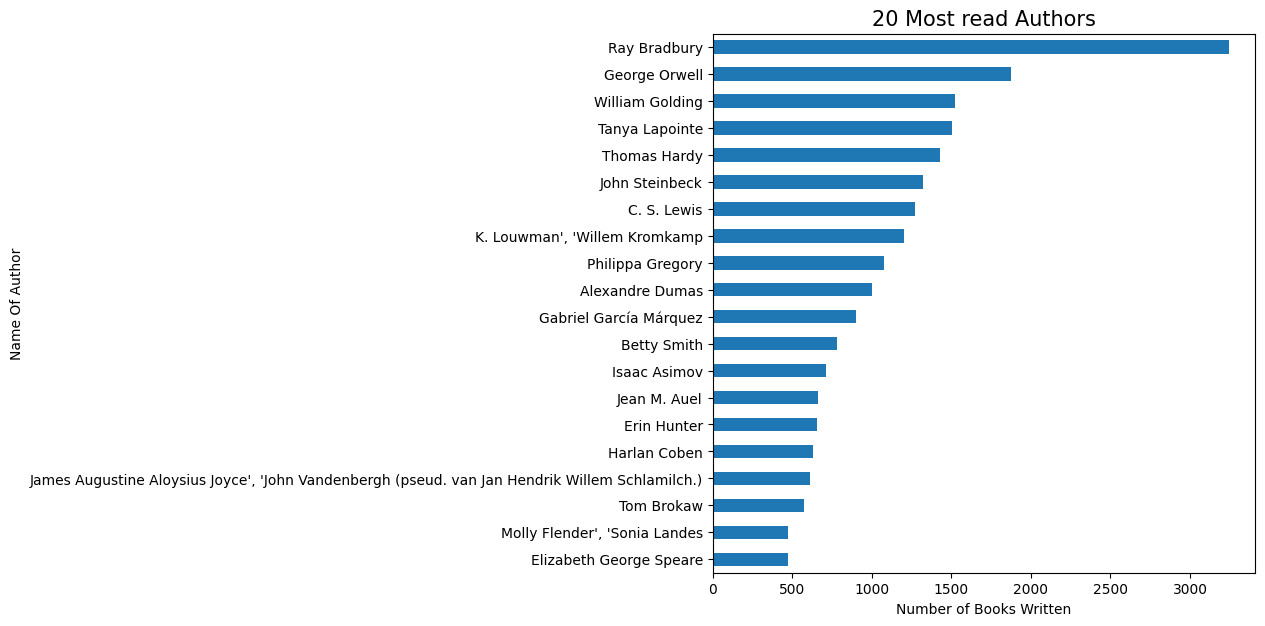

In [18]:
df['authors'].value_counts().head(20).sort_values(ascending = True).plot(kind='barh', figsize=(7,7))
plt.title('20 Most read Authors', fontsize = 15)
plt.ylabel('Name Of Author')
plt.xlabel('Number of Books Written')
plt.show()


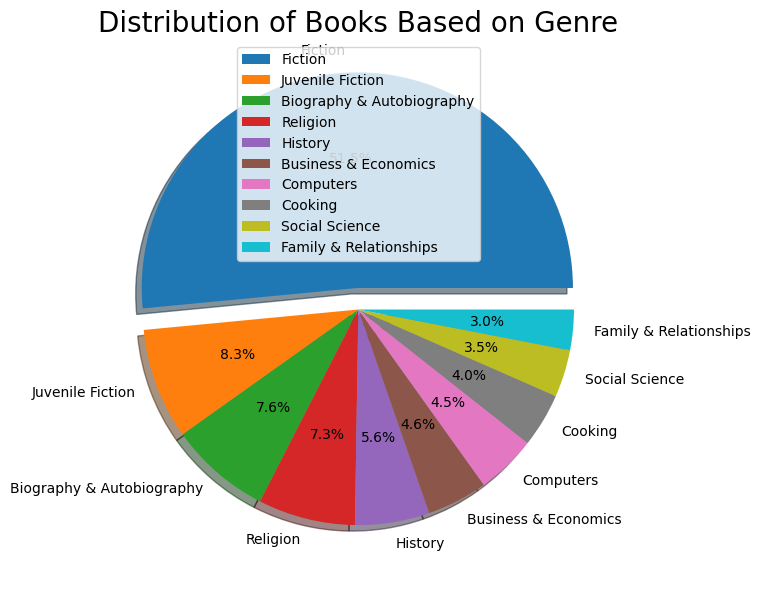

In [19]:
plt.figure(figsize=(7,7))
labels=['Fiction','Juvenile Fiction','Biography & Autobiography','Religion','History','Business & Economics','Computers','Cooking','Social Science','Family & Relationships']
plt.pie(df['categories'].value_counts().head(10),explode=(0.1,0,0,0,0,0,0,0,0,0), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Books Based on Genre', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

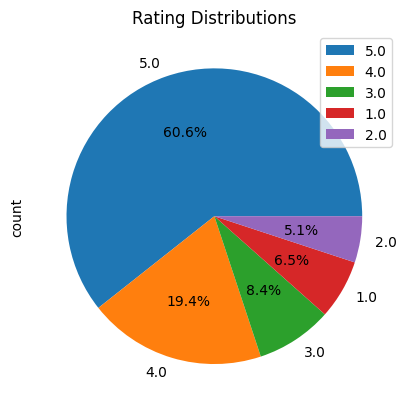

In [20]:
df['review/score'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("Rating Distributions")
plt.legend()
plt.show()

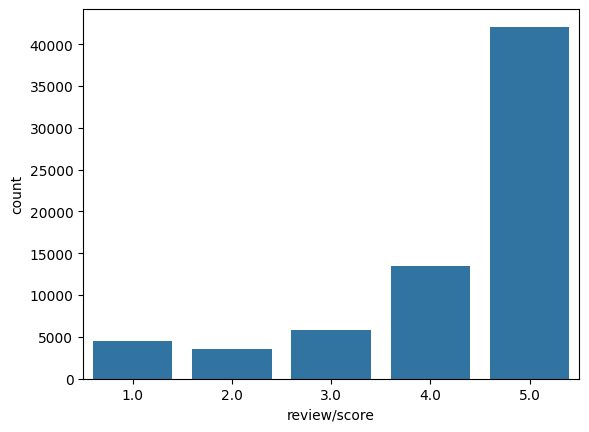

In [21]:
sns.countplot(x=df['review/score'])
plt.show()

In [ ]:
df['Cleaned'] = df['Review Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Cleaned'] = df['Cleaned'].str.replace('[^\w\s]','')
df['Cleaned'] = df['Cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Cleaned'] = df['Cleaned'].str.replace('\d+', '')
lemmatizer = WordNetLemmatizer()
df1['Cleaned'] = [lemmatizer.lemmatize(row) for row in df1['Cleaned']]
x = df['Cleaned']       # Independent Variable
y = df['Star Rating']   # Dependent Variable
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x,y, random_state = 2)
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=5000)
tfidf_vect_ngram.fit(x)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)


In [ ]:
nb = naive_bayes.MultinomialNB(alpha = 0.6)

model = nb.fit(xtrain_tfidf_ngram, train_y)

pred = model.predict(xvalid_tfidf_ngram)

acc = accuracy_score(valid_y,pred)

print('Accuracy of validation set is :', acc)

In [ ]:
score = f1_score(valid_y, pred, average='weighted')
print("Weighted F score is ",score)

In [ ]:
df2 = df[['id','Review Text']]
df3 = df2.dropna()              #Removing null values
df3.head()

In [ ]:
#To lower case
df3['Cleaned'] = df3['Review Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Removing punctuation
df3['Cleaned'] = df3['Cleaned'].str.replace('[^\w\s]','')

#Removing Stopwords
df3['Cleaned'] = df3['Cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#Removing digits
df3['Cleaned'] = df3['Cleaned'].str.replace('\d+', '')

#Lemmatizing
lemmatizer = WordNetLemmatizer()
df3['Cleaned'] = [lemmatizer.lemmatize(row) for row in df3['Cleaned']]
df3.head()

In [ ]:
x1 = df3['Cleaned']


In [ ]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=5000)
tfidf_vect_ngram.fit(x1)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(x1)

In [ ]:
test_pred = model.predict(xtest_tfidf_ngram)
df3['Star Rating'] = test_pred
df4 = df3[['id','Star Rating']]
df4.to_csv("predictions.csv")